In [1]:
from models.bag_of_models import BagOfModels
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
top_10 = ['relay', 'empirical', 'brain', 'availability', 'http', 'classifier', 'protein', 'survey', 'literature', 'we']
bot_10 = ['library', 'book', 'calculation', 'page', 'table', 'but', 'so', 'matlab', 'firstly', 'according']
features = top_10 + bot_10

In [3]:
bow = pd.read_csv("saved/bow_50words_40.csv", index_col="PaperId")#[features]
target = pd.read_csv("saved/binned_citations_threshold_2.csv", index_col="PaperId")

In [4]:
"matlab" in bow.columns

False

In [5]:
import json
results = json.load(open('results/bin_threshold_results_50features.json'))

In [6]:
results

{'Threshold_1': {'test': [{'LinearSVC': 0.18379446640316208,
    'NaiveBayes': 0.14473684210526314,
    'NeuralNetwork': 0.18309859154929578,
    'RandomForest': 0.18483674598782512,
    'XGBoost': 0.18570683359415754}],
  'train': [{'LinearSVC': 0.929903536977492,
    'NaiveBayes': 0.45172044290987023,
    'NeuralNetwork': 0.8734561652156306,
    'RandomForest': 0.9260928346101848,
    'XGBoost': 1.0}],
  'val': [{'LinearSVC': 0.45261669024045265,
    'NaiveBayes': 0.6112600536193029,
    'NeuralNetwork': 0.48767123287671227,
    'RandomForest': 0.44608567208271793,
    'XGBoost': 0.44832605531295483}]},
 'Threshold_10': {'test': [{'LinearSVC': 0.1949238578680203,
    'NaiveBayes': 0.157701447396846,
    'NeuralNetwork': 0.19958246346555322,
    'RandomForest': 0.19956140350877194,
    'XGBoost': 0.19917012448132781}],
  'train': [{'LinearSVC': 0.8641655886157825,
    'NaiveBayes': 0.5299285463277498,
    'NeuralNetwork': 0.8939918213274615,
    'RandomForest': 0.8272863568215891,
   

In [7]:
av_accuracy = {}
for thrsh, r in results.items():
    av_accuracy[thrsh] = {}
    for t_set, models in r.items():
        m = models[0]
        av_accuracy[thrsh][t_set] = np.mean([acc for acc in m.values()])

In [8]:
pd.DataFrame(av_accuracy)

,Threshold_1,Threshold_10,Threshold_2,Threshold_20,Threshold_40,Threshold_5,Threshold_50
test,0.176435,0.190188,0.169507,0.174559,0.174999,0.180189,0.161165
train,0.836235,0.823074,0.819565,0.866444,0.852769,0.836233,0.842162
val,0.489192,0.552917,0.494149,0.530743,0.577433,0.520374,0.552032


In [9]:
from pprint import pprint
pprint(av_accuracy)

{'Threshold_1': {'test': 0.17643469592794075,
                 'train': 0.8362345959426355,
                 'val': 0.48919194082642814},
 'Threshold_10': {'test': 0.19018785934410384,
                  'train': 0.8230744626185166,
                  'val': 0.5529168276596419},
 'Threshold_2': {'test': 0.16950731541719008,
                 'train': 0.819564633866524,
                 'val': 0.4941489222434382},
 'Threshold_20': {'test': 0.17455897933515932,
                  'train': 0.8664441752535244,
                  'val': 0.5307425108766525},
 'Threshold_40': {'test': 0.174998890963336,
                  'train': 0.8527691802313655,
                  'val': 0.5774327770685662},
 'Threshold_5': {'test': 0.18018909542717526,
                 'train': 0.836232790997921,
                 'val': 0.520374100641279},
 'Threshold_50': {'test': 0.16116476111832986,
                  'train': 0.84216228113049,
                  'val': 0.5520319991940873}}


In [10]:
from sklearn.model_selection import train_test_split
from models import util
X, X_test, y, y_test = train_test_split(bow.values, target.values, test_size=0.1)
X, y = util.get_uniform_version(X, y)

In [11]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
predictions = model.predict_proba(X_test)

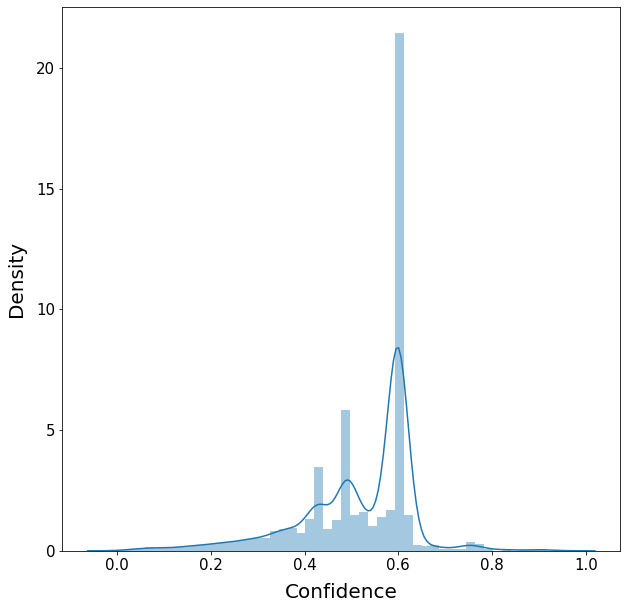

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plt.xlabel("Confidence", fontsize=20, labelpad=10)
plt.ylabel("Density", fontsize=20, labelpad=10)
sns.distplot(predictions[::, 0])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

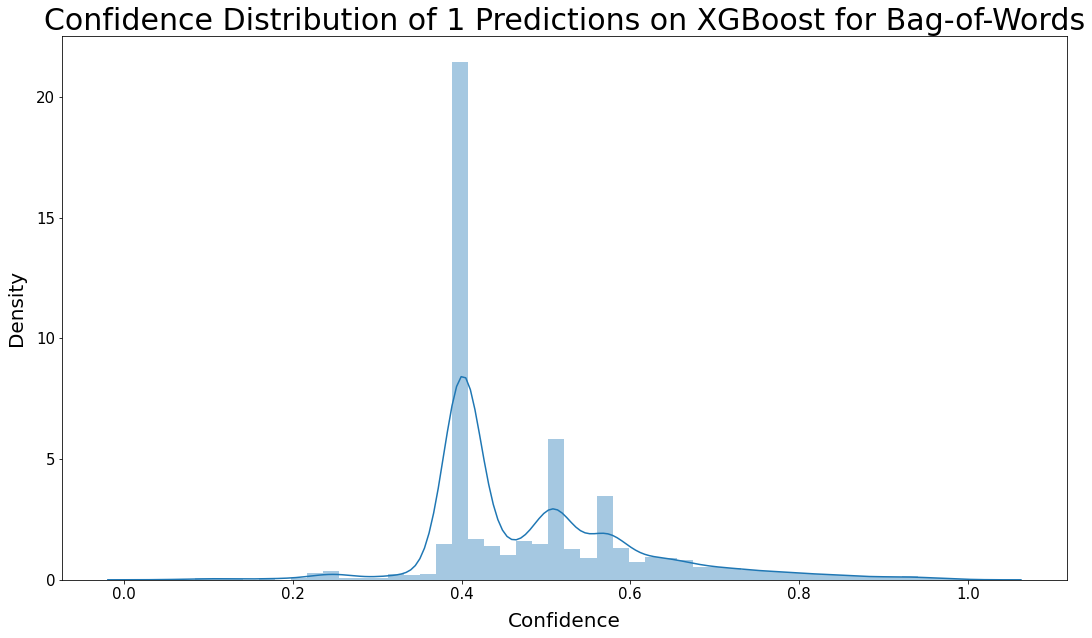

In [35]:
plt.figure(figsize=(18,10))
plt.title("Confidence Distribution of 1 Predictions on XGBoost for Bag-of-Words", fontsize=30)
plt.xlabel("Confidence", fontsize=20, labelpad=10)
plt.ylabel("Density", fontsize=20, labelpad=10)
sns.distplot(predictions[::, 1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
last_20  = pd.read_csv("saved/final_dataset_cs_papers_last_20.csv", index_col="PaperId")
meta = pd.read_csv("saved/metadata_features.csv", index_col="PaperId")

In [17]:
meta.index

Int64Index([2013266033, 2147483915, 2147483970, 2013266260, 2013266632,
            2147484477, 2550138040, 2013267173, 2013267216, 2013267229,
            ...
            1486540701, 2291847203, 2023411952, 2023412037, 2023412288,
            2023412552, 1889195062, 2157630710, 2560284266, 2023413421],
           dtype='int64', name='PaperId', length=61019)

In [18]:
last_20.index

Int64Index([2013266033, 2147483915, 2147483970, 2013266260, 2013266632,
            2147484477, 2550138040, 2013267173, 2013267216, 2013267229,
            ...
            1486540701, 2291847203, 2023411952, 2023412037, 2023412288,
            2023412552, 1889195062, 2157630710, 2560284266, 2023413421],
           dtype='int64', name='PaperId', length=61019)

In [19]:
years_since_pub = last_20[last_20.index.isin(meta.index)].YearsSincePublication

In [50]:
years = np.repeat(2020, years_since_pub.size) - years_since_pub
years = np.round(years).astype(int)
years = years.value_counts().sort_index()

In [51]:
years

2000     877
2001    1725
2002    1869
2003    2410
2004    2518
2005    2773
2006    2980
2007    3166
2008    3598
2009    3781
2010    4378
2011    4676
2012    5045
2013    5499
2014    5215
2015    4860
2016    4230
2017    1231
2018     188
Name: YearsSincePublication, dtype: int64

In [52]:
every_2 = []
for i in range(years.size-1):
    if i%2==0:
        every_2.append(years.values[i]+years.values[i+1])

In [53]:
every_2

[2602, 4279, 5291, 6146, 7379, 9054, 10544, 10075, 5461]

In [57]:
np.arange(2002, 201, 2)

array([2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])

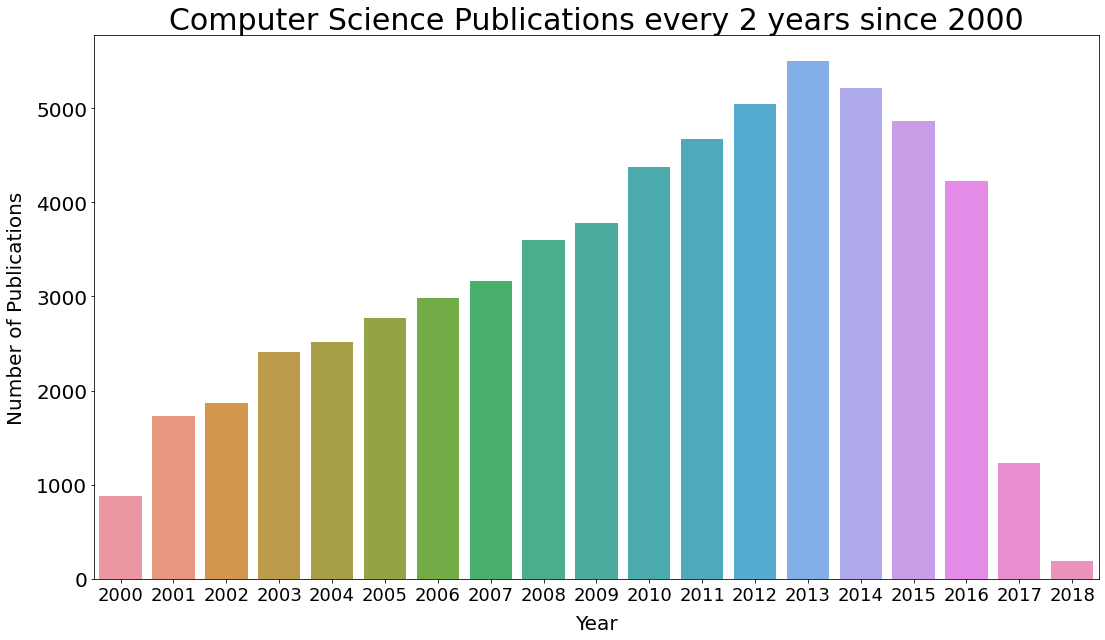

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.title("Computer Science Publications per year since 2000", fontsize=30)
plt.xlabel("Year", fontsize=20, labelpad=10)
plt.ylabel("Number of Publications", fontsize=20, labelpad=10)
sns.barplot(x=years.index, y=years.values)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.show()

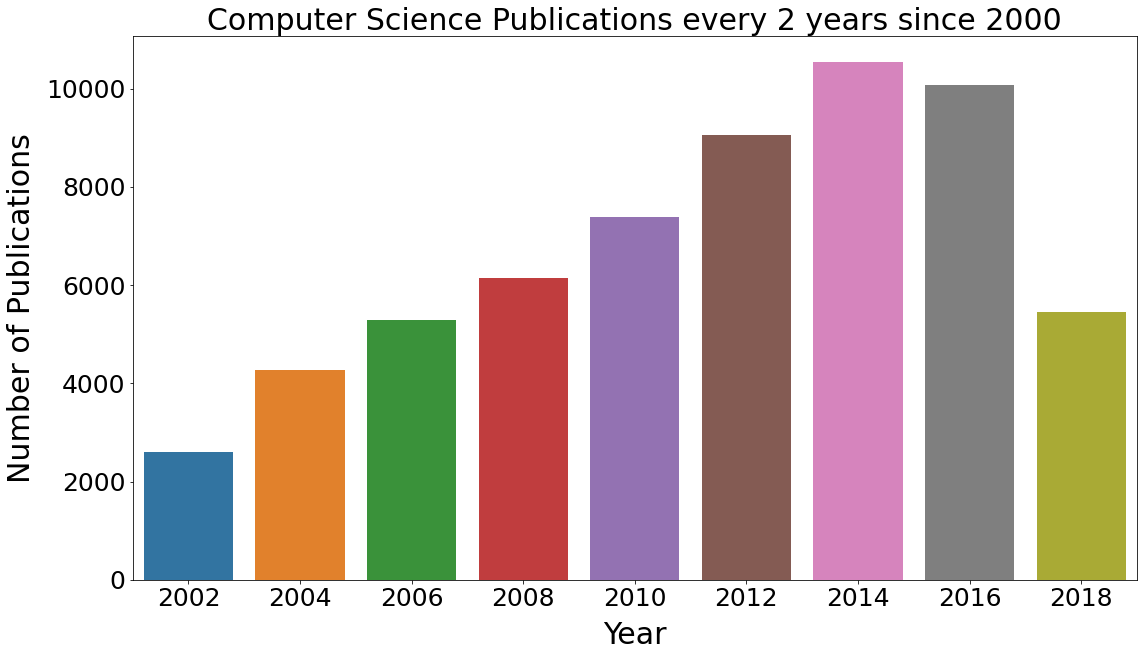

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.title("Computer Science Publications every 2 years since 2000", fontsize=30)
plt.xlabel("Year", fontsize=30, labelpad=10)
plt.ylabel("Number of Publications", fontsize=30, labelpad=10)
sns.barplot(x=np.arange(2002, 2019, 2), y=every_2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()